## Softmax Classifier 2

### Preparation

In [ ]:
# Import the libraries we need for this lab

# Using the following line code to install the torchvision library
!pip install torchvision==0.9.1 torch==1.8.1

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import numpy as np

ERROR: Ignored the following yanked versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.15.0
ERROR: Could not find a version that satisfies the requirement torchvision==0.9.1 (from versions: 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.17.2, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.20.0, 0.20.1)
ERROR: No matching distribution found for torchvision==0.9.1


In [ ]:
# The function to plot parameters

def PlotParameters(model):
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:

            # Set the label for the sub-plot.
            ax.set_xlabel("class: {0}".format(i))

            # Plot the image.
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])

        # Ensure the plot is shown correctly with multiple plots
        # in a single Notebook cell.
    plt.show()

In [ ]:
# Plot the data
def show_data(data_sample):
  plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
  plt.title('y = ' + str(data_sample[1]))

### Make Some Data

In [ ]:
# Create and print the training dataset
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n", train_dataset)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 636kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.44MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.14MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Print the training dataset:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [ ]:
# Create and print the validating dataset
validation_dataset = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())
print("Print the validating dataset:\n ", validation_dataset)

Print the validating dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [ ]:
# Print the type of the element
print("Type of data element: ", type(train_dataset[0][1]))

Type of data element:  <class 'int'>


In [ ]:
# Print the label
print("The label: ", train_dataset[3][1])

The label:  1


The Image:  None


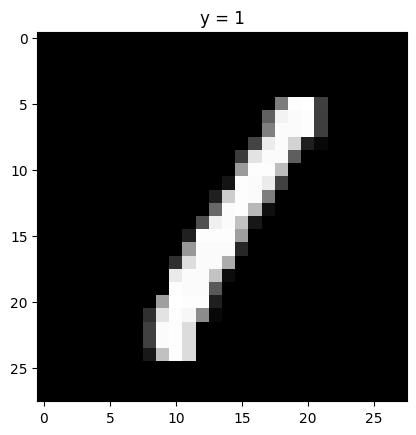

In [ ]:
# Plot the image
print("The Image: ", show_data(train_dataset[3]))

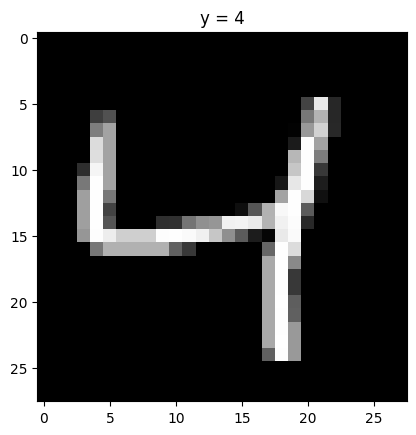

In [ ]:
# Plot the image
show_data(train_dataset[2])

### Build a Softmax Classifer

In [ ]:
# Define softmax classifier class
class Softmax(nn.Module):

  # Constructor
  def __init__(self, input_size, output_size):
    super(Softmax, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  # Prediction
  def forward(self, x):
    z = self.linear(x)
    return z

In [ ]:
# Print the shape of train dataset
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
# Set input size and output size
input_dim = 28*28
output_dim = 10

### Define the Softmax Classifier, Criterion Function, Optimizer, and Train the Model

In [ ]:
# Create the model
model = Softmax(input_dim, output_dim)
print("Print the mode:\n", model)

Print the mode:
 Softmax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [ ]:
# Print the parameters
print("W: ", list(model.parameters())[0].size())
print("b: ", list(model.parameters())[1].size())

W:  torch.Size([10, 784])
b:  torch.Size([10])


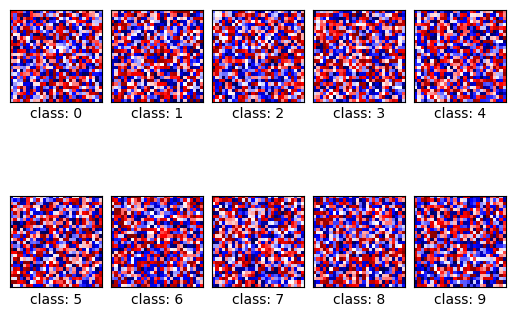

In [ ]:
# Plot the model parameters for each class
PlotParameters(model)

In [ ]:
# Define the learning rate, optimizer, criterion and data loader
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [ ]:
# Train the model
from tqdm import tqdm
n_epochs = 10
loss_list = []
accuracy_list = []
N_test = len(validation_dataset)

def train_model(epochs):
  for epoch in range(epochs):
    for x, y in tqdm(train_loader):
      optimizer.zero_grad()
      z = model(x.view(-1, 28*28)) # Flatten
      loss = criterion(z, y)
      loss.backward()
      optimizer.step()
    correct = 0
    # perform a prediction on the validationdata
    for x_test, y_test in validation_loader:
      z = model(x_test.view(-1, 28*28))
      _,yhat = torch.max(z.data, 1)
      correct += (yhat==y_test).sum().item()
    accuracy = correct/N_test
    loss_list.append(loss.data)
    accuracy_list.append(accuracy)
    print(f"Epoch {epoch+1} - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
train_model(n_epochs)

100%|██████████| 600/600 [00:07<00:00, 77.14it/s]


Epoch 1 - Loss: 0.4117, Accuracy: 0.8928


100%|██████████| 600/600 [00:07<00:00, 81.16it/s]


Epoch 2 - Loss: 0.3636, Accuracy: 0.9033


100%|██████████| 600/600 [00:07<00:00, 81.95it/s]


Epoch 3 - Loss: 0.3442, Accuracy: 0.9093


100%|██████████| 600/600 [00:06<00:00, 85.94it/s]


Epoch 4 - Loss: 0.3327, Accuracy: 0.9126


100%|██████████| 600/600 [00:07<00:00, 85.10it/s]


Epoch 5 - Loss: 0.3247, Accuracy: 0.9148


100%|██████████| 600/600 [00:06<00:00, 92.40it/s]


Epoch 6 - Loss: 0.3185, Accuracy: 0.9164


100%|██████████| 600/600 [00:06<00:00, 91.42it/s]


Epoch 7 - Loss: 0.3134, Accuracy: 0.9175


100%|██████████| 600/600 [00:06<00:00, 87.94it/s]


Epoch 8 - Loss: 0.3091, Accuracy: 0.9184


100%|██████████| 600/600 [00:07<00:00, 82.84it/s]


Epoch 9 - Loss: 0.3054, Accuracy: 0.9195


100%|██████████| 600/600 [00:07<00:00, 82.55it/s]


Epoch 10 - Loss: 0.3020, Accuracy: 0.9204


### Analyze Results

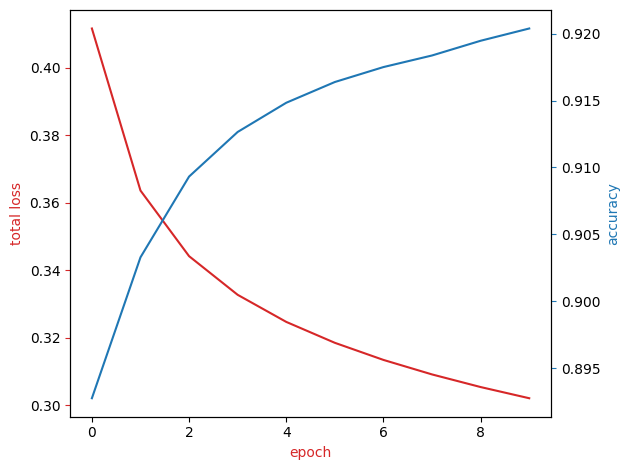

In [ ]:
# Plot the loss and accuracy
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('total loss', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color='tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.plot(accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

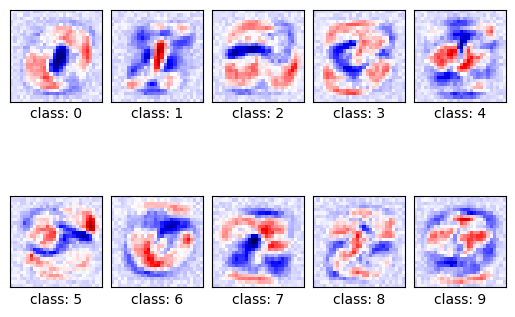

In [ ]:
PlotParameters(model)

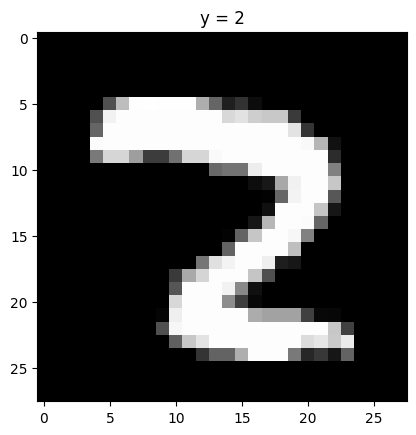

yhat: tensor([7])
probability of class:  0.7136511206626892


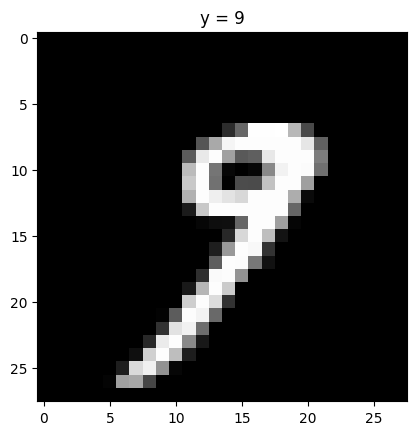

yhat: tensor([7])
probability of class:  0.706141471862793


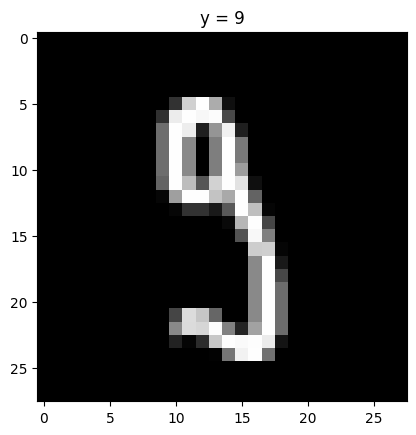

yhat: tensor([5])
probability of class:  0.7197008728981018


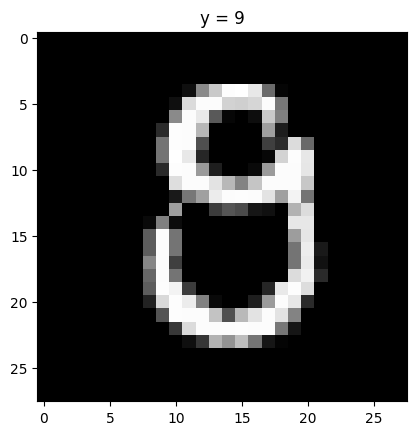

yhat: tensor([8])
probability of class:  0.36662328243255615


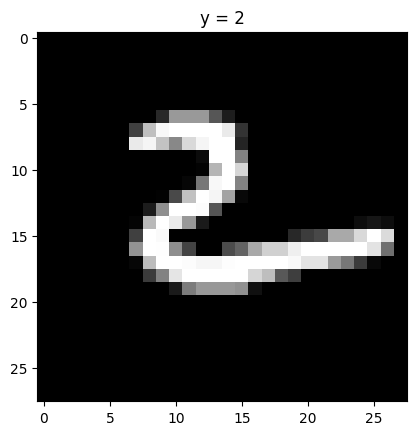

yhat: tensor([6])
probability of class:  0.512283980846405


In [ ]:
# Plot the misclassified samples
Softmax_fn = nn.Softmax(dim=-1)
count = 0

for x, y in validation_dataset:
  z = model(x.reshape(-1, 28*28))
  _,yhat = torch.max(z, 1)
  if yhat != y:
    show_data((x, y))
    plt.show()
    print("yhat:", yhat)
    print("probability of class: ", torch.max(Softmax_fn(z)).item())
    count += 1
  if count >= 5:
    break

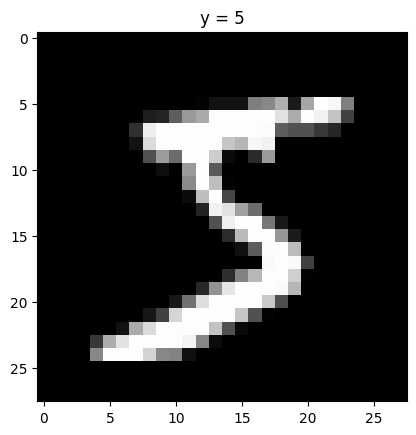

yhat: tensor([5])
probability of class:  0.8575319051742554


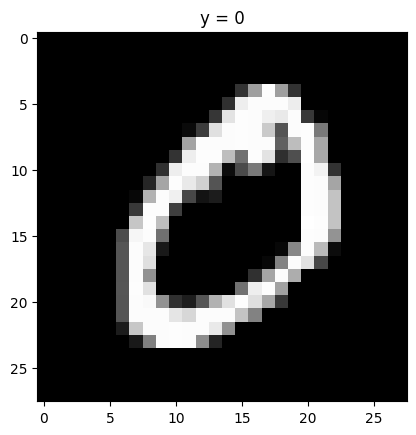

yhat: tensor([0])
probability of class:  0.9997060894966125


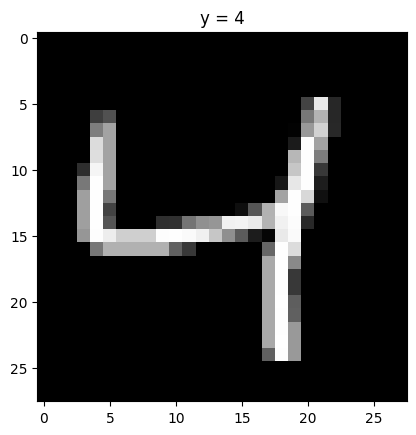

yhat: tensor([4])
probability of class:  0.8744311928749084


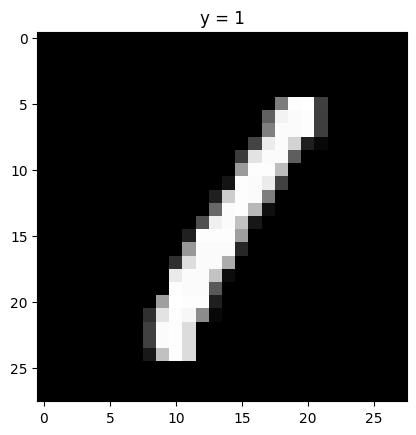

yhat: tensor([1])
probability of class:  0.9663243889808655


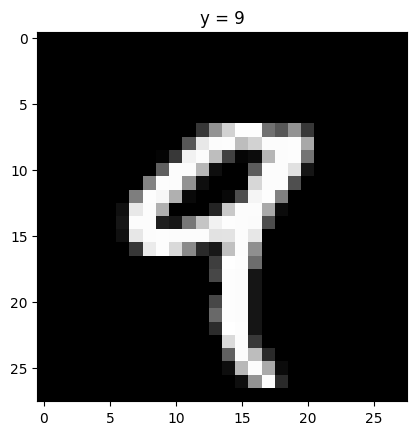

yhat: tensor([9])
probability of class:  0.9266782999038696


In [ ]:
# Plot the classified samples
Softmax_fn = nn.Softmax(dim=-1)
count = 0

for x, y in validation_dataset:
  z = model(x.reshape(-1, 28*28))
  _,yhat = torch.max(z, 1)
  if yhat == y:
    show_data((x, y))
    plt.show()
    print("yhat:", yhat)
    print("probability of class: ", torch.max(Softmax_fn(z)).item())
    count += 1
  if count >= 5:
    break